In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import DataReader
from pandas import Series, DataFrame

In [2]:
# 予想したい日の前日
filedate = '20220311'
# 機械学習累積データ作成日
filedateAC = '20220311'

In [3]:
# 予想のために作成したinputデータ（予想したい日の前日）
df_inputai_c = pd.read_csv('data/inputAI2_' + filedate + '.csv', index_col=0, header=[0], parse_dates=[0])

In [4]:
# 事前に作成した機械学習用データ（機械学習累積データ作成日）
df_target = pd.read_csv('data/inputAIAC2_' + filedateAC + '.csv', index_col=0, header=[0], parse_dates=[0])

In [5]:
# ここからscikit-learn用のデータクラスを持つオブジェクトを作る
import sklearn

In [6]:
stockanalysis = sklearn.utils.Bunch()

In [7]:
# Key_xを削除
df_target = df_target.drop('key_x', axis=1)

In [8]:
# 当日の前日比'Diff'を目的変数"target"とする
stockanalysis['target'] = df_target['Diff_y']

In [9]:
# 説明変数を"data"に入れる
stockanalysis['data'] = df_target.iloc[:, 0:169]

In [10]:
# 特徴量の名前も入れておく
# stockanalysis['feature_names'] = ['PER', 'PBR', 'HAITO',
#                                  'ROE', 'ROA', 'MA05',
#                                  'MA25', 'MA75', 'RSI',
#                                  'AdjClose', 'Close', 'High',            
#                                  'Low', 'Open', 'Volume',           
#                                  'INDR4', 'TSPLB', 'TSPLS',
#                                  'PIN80B', 'PIN80S', 'Diff']

In [11]:
# 訓練セットとテストセットに分割
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
stockanalysis['data'], stockanalysis['target'], random_state=0)

In [12]:
# データ読み込み完了
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7167, 169) (2390, 169) (7167,) (2390,)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lreg = LinearRegression()

In [15]:
# fitでモデルを作りますが、使うのは学習用のデータだけです。
lreg.fit(X_train, Y_train)

LinearRegression()

In [16]:
# 回帰係数
print(lreg.coef_)
# 切片（誤差）
print(lreg.intercept_)
# 決定係数
print(lreg.score(X_train, Y_train))

[-2.08144792e-06 -2.67420847e-04 -4.37741311e-04  5.83589327e-05
 -2.15275604e-05  3.83918158e-03 -7.16522326e-04  2.32540088e-04
  9.20254664e-05  2.93261426e-03 -2.92882383e-03 -3.53165168e-06
  9.42689161e-06 -2.39053085e-05  4.81113682e-10 -4.49416769e-04
  4.33378327e-04 -2.67778340e-05  4.53771148e-05 -3.23914560e-05
  6.60253737e-10  7.72306199e-06  1.49060710e-05  1.22714305e-05
  5.40481588e-06 -1.93129129e-05  1.82213227e-10  2.20656769e-07
 -2.15928405e-06 -5.31611464e-06  2.35846703e-05  1.76868339e-05
 -1.20837888e-09 -5.08386705e-06 -5.08389543e-06  4.90709883e-05
 -4.29846691e-05  1.94124530e-05 -1.30835552e-09 -2.42151315e-05
 -2.42151575e-05  1.22196696e-05 -1.78741494e-06 -6.14374283e-06
 -9.99583398e-10 -2.04301236e-04  2.37439155e-04 -1.12727924e-05
  1.38057692e-05 -2.02296407e-05  2.02295623e-09 -5.89160804e-05
  7.84206829e-05  1.20464971e-05 -7.24108902e-06 -1.69730091e-05
 -4.35360754e-10 -7.32205362e-05  7.26353060e-05 -2.69585725e-05
  5.64840096e-05 -2.56816

In [17]:
# 予測を、学習用のデータと、テスト用のデータ、両方でやる。
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [18]:
print('X_trainを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean(((Y_train - pred_train)*100) ** 2)))
    
print('X_testを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean(((Y_test - pred_test)*100) ** 2)))

X_trainを使ったモデルの平均二乗誤差＝4.47
X_testを使ったモデルの平均二乗誤差＝4.66


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Text(0.5, 1.0, 'Residual Plots')

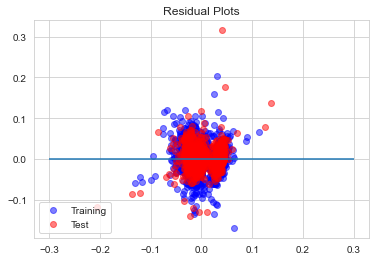

In [20]:
# 学習用のデータの残差プロットです。
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用のデータの残差プロットです。
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# y=0の水平な線を描いておきます。
plt.hlines(y=0,xmin=-0.3,xmax=0.3)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

In [21]:
# Key_xを削除
df_analysis = df_inputai_c.drop('key', axis=1)

In [22]:
df_analysis.columns

Index(['PER', 'PBR', 'HAITO', 'ROE_x', 'ROA_x', 'MA05', 'MA25', 'MA75', 'RSI',
       'AdjClose_c',
       ...
       '高値.10', '安値.10', '出来高.4', '前日比%.10', '終値.11', '始値.11', '高値.11',
       '安値.11', '出来高.5', '前日比%.11'],
      dtype='object', length=169)

In [23]:
# 説明変数を"data"に入れる
df_analysis = df_analysis.iloc[:, 0:169]

In [24]:
# 翌日の株価予想
pred_test = lreg.predict(df_analysis)

In [25]:
# 翌日の株価予想データ取得
np.savetxt('data/predict_' + filedate + '.csv', pred_test)